# Import Modules

In [1]:
import pandas as pd

import utils

# Load Data

In [2]:
target_vegetable = "キャベツ"
train_size = 4000

In [3]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [4]:
future = target_values.shape[0] - train_size
pred_y = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=100)

training loss = 1.0179588794708252
test loss = 0.4186948239803314
training loss = 0.30963101983070374
test loss = 0.36562880873680115
training loss = 0.13311262428760529
test loss = 0.551904559135437
training loss = 0.1216602548956871
test loss = 0.6260185837745667
training loss = 0.12035651504993439
test loss = 3.9611685276031494
training loss = 0.1157262846827507
test loss = 0.4751698970794678
training loss = 0.11325517296791077
test loss = 0.5166379809379578
training loss = 0.11315497756004333
test loss = 0.5634040832519531
training loss = 0.11213640123605728
test loss = 0.4303719401359558
training loss = 0.11172964423894882
test loss = 0.48506438732147217


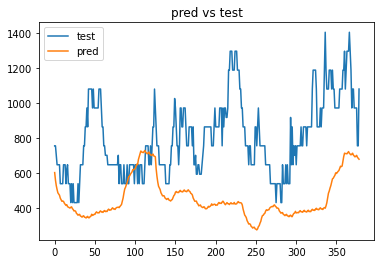

In [5]:
utils.plot_prediction(pred_y, test_y, ss)